#**1.Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#**2. Load Datasets**

In [ ]:
data = pd.read_csv ('/content/sales-of-shampoo-over-a-three-ye.csv')

In [ ]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


#**3. Convert Month to datetime**

In [ ]:
data['Month'] = pd.date_range(start = '2000-01-01',periods = len(data), freq = "M")
data.set_index('Month',inplace= True)

#**4. Plot the Time Series**

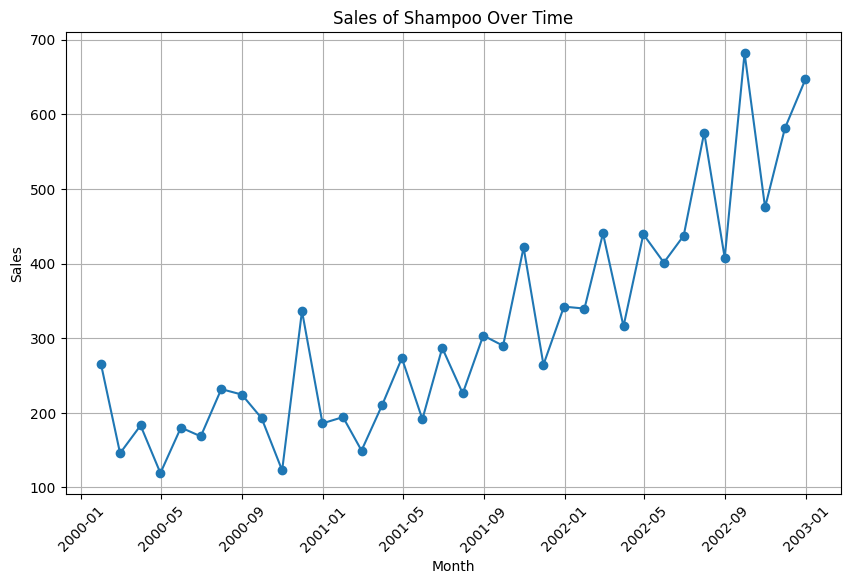

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'],marker = 'o', linestyle= '-')
plt.title ('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#**5. Decomposition**

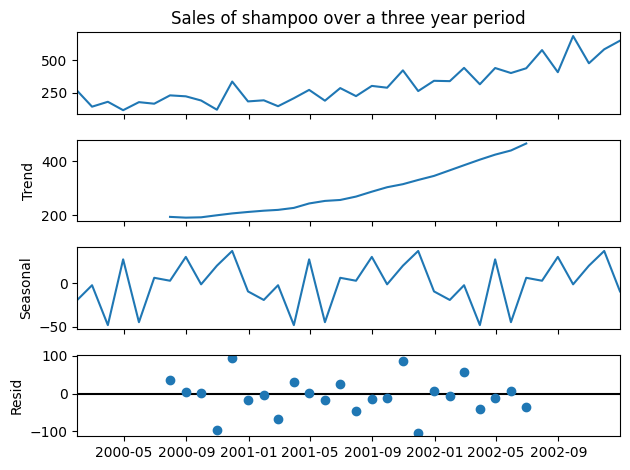

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model='additive')
fig = decomposition.plot()
plt.show()

#**6.Forecasting with ARIMA**

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_test = adfuller (data['Sales of shampoo over a three year period'])
print(f'ADF STATISTICS : {ad_test[0]}')
print(f'p-value        :  {ad_test[1]}')

ADF STATISTICS : 3.060142083641181
p-value        :  1.0


#**7. Fit an ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(data['Sales of shampoo over a three year period'], order= (1,1,1))
results = model.fit()
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               03:38:10   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

#**8. Forecasting the Future Values**

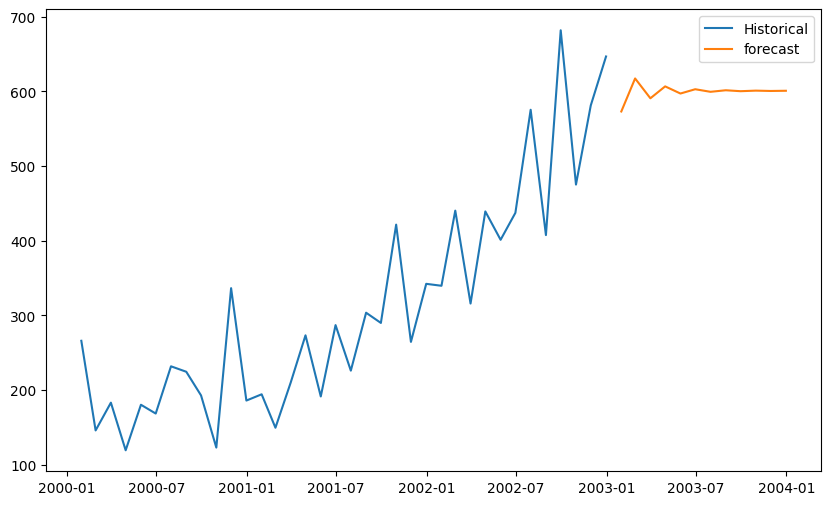

In [ ]:
forecast = results.forecast(steps= 1)

plt.figure(figsize = (10,6))
plt.plot(data.index,data ['Sales of shampoo over a three year period'], label = 'Historical')
plt.plot(forecast.index, forecast,label = 'forecast')
plt.legend()
plt.show()